In [1]:
import os, os.path
import numpy as np
import pandas as pd
import model_attributes as ma
from attribute_table import AttributeTable
import model_afolu as mafl
import model_ippu as mi
import model_circular_economy as mc
import model_energy as me
import model_socioeconomic as se
from model_socioeconomic import Socioeconomic
import setup_analysis as sa
import support_functions as sf
import importlib
import time
import warnings
import matplotlib.pyplot as plt

importlib.reload(ma)
importlib.reload(sa)
importlib.reload(sf)
importlib.reload(mafl)
importlib.reload(mc)
importlib.reload(mi)
importlib.reload(me)
importlib.reload(se)



dir_dat = "/Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/from Edmundo/ippu_calib_issue"

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/data_structures.py:637: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/data_structures.py:637: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


In [2]:

#demand management
demand_mgt = "demand_mgt.csv"
df_demand = pd.read_csv(os.path.join(dir_dat, demand_mgt))

#clinker subsitution
clinker_reduction = "clinker.csv"
df_clinker = pd.read_csv(os.path.join(dir_dat, clinker_reduction))

#carbon capture
ccs = "ccs_new.csv"
df_ccs = pd.read_csv(os.path.join(dir_dat, ccs))


#f-gases reduction
fgases =  "f_gases_new.csv"
df_fgases = pd.read_csv(os.path.join(dir_dat, fgases))


#n20 abatement
n2o = "n2o.csv"
df_n2o = pd.read_csv(os.path.join(dir_dat, n2o))

#n20 abatement
recycle = "recycle.csv"
df_recycle = pd.read_csv(os.path.join(dir_dat, recycle))



#list all policies
    
exp_file =  "transformations_experiment.csv"
df_exp =  pd.read_csv(os.path.join(dir_dat, exp_file))
policies = np.unique(df_exp['Policy_ID'])
#policy_names = np.unique(df_exp['Policy_name'])
#load calibration parameters
#name_file = r"\data_complete_future.csv"
name_file = "data_complete_future_2022_06_28_pivot.csv"
dir_calib_data = r"C:\Users\AP03054557\OneDrive\Edmundo-ITESM\3.Proyectos\42. LAC Decarbonization\Git-LAC-Calib\lac_decarbonization\calibration\IPPU\CalibrationVectors"
df_data_calib = pd.read_csv(os.path.join(dir_dat, name_file))

nations = np.unique(df_data_calib['nation'])


In [34]:

df_input_data[fields_elast] = 1

,elasticity_ippu_cement_production_to_gdp,elasticity_ippu_chemicals_production_to_gdp,elasticity_ippu_electronics_production_to_gdp,elasticity_ippu_glass_production_to_gdp,elasticity_ippu_lime_and_carbonite_production_to_gdp,elasticity_ippu_metals_production_to_gdp,elasticity_ippu_paper_production_to_gdp,elasticity_ippu_plastic_production_to_gdp,elasticity_ippu_product_use_lubricants_product_use_rate_to_gdppc,elasticity_ippu_product_use_ods_other_product_use_rate_to_gdppc,elasticity_ippu_product_use_ods_refrigeration_product_use_rate_to_gdppc,elasticity_ippu_product_use_paraffin_wax_product_use_rate_to_gdppc,elasticity_ippu_rubber_and_leather_production_to_gdp,elasticity_ippu_textiles_production_to_gdp
0,0.05628,0.110147,0.04666,0.039346,0.024668,0.046933,0.107451,0.054122,0.01,0.01,0.01,0.01,0.012603,0.014265
1,0.05628,0.110147,0.04666,0.039346,0.024668,0.046933,0.107451,0.054122,0.01,0.01,0.01,0.01,0.012603,0.014265
2,0.05628,0.110147,0.04666,0.039346,0.024668,0.046933,0.107451,0.054122,0.01,0.01,0.01,0.01,0.012603,0.014265
3,0.05628,0.110147,0.04666,0.039346,0.024668,0.046933,0.107451,0.054122,0.01,0.01,0.01,0.01,0.012603,0.014265
4,0.05628,0.110147,0.04666,0.039346,0.024668,0.046933,0.107451,0.054122,0.01,0.01,0.01,0.01,0.012603,0.014265
5,0.05628,0.110147,0.04666,0.039346,0.024668,0.046933,0.107451,0.054122,0.01,0.01,0.01,0.01,0.012603,0.014265
6,0.05628,0.110147,0.04666,0.039346,0.024668,0.046933,0.107451,0.054122,0.01,0.01,0.01,0.01,0.012603,0.014265
7,0.05628,0.110147,0.04666,0.039346,0.024668,0.046933,0.107451,0.054122,0.01,0.01,0.01,0.01,0.012603,0.014265
8,0.05628,0.110147,0.04666,0.039346,0.024668,0.046933,0.107451,0.054122,0.01,0.01,0.01,0.01,0.012603,0.014265
9,0.05628,0.110147,0.04666,0.039346,0.024668,0.046933,0.107451,0.054122,0.01,0.01,0.01,0.01,0.012603,0.014265


In [59]:
dict_out = {}
df_all = []
fields_elast = [x for x in df_input_data.columns if "elasticity_ippu" in x]
elast = [1, 1, 1, 1, 1] + list(1-np.arange(31)/15)
for policy in [0, 6]:
    
    dict_out.update({policy: {}})
    
    #policy = policies[1]
    #load transformation tables
    #demand management
    tdemand = list(df_exp[df_exp['Policy_ID']==policy]['demand'])[0]
    df_tdemand = df_demand[df_demand['TransformationName']==tdemand].copy().reset_index(drop = True)

    #clinker
    tclinker = list(df_exp[df_exp['Policy_ID']==policy]['clinker'])[0]
    df_tclinker = df_clinker[df_clinker['TransformationName']==tclinker].copy().reset_index(drop = True)

    #carbon capture
    tccs = list(df_exp[df_exp['Policy_ID']==policy]['ccs'])[0]
    df_tccs = df_ccs[df_ccs['TransformationName']==tccs].reset_index(drop = True)

    #f-gases reduction
    tfgases = list(df_exp[df_exp['Policy_ID']==policy]['fgasreduction'])[0]
    df_tfgases = df_fgases[df_fgases['TransformationName']==tfgases].copy().reset_index(drop = True)

    #n20 abatement
    tn2o = list(df_exp[df_exp['Policy_ID']==policy]['n2o'])[0]
    df_tn2o = df_n2o[df_n2o['TransformationName']==tn2o].copy().reset_index(drop = True)

    #recycle
    trecycle = list(df_exp[df_exp['Policy_ID']==policy]['recycling'])[0]
    df_trecycle = df_recycle[df_recycle['TransformationName']==trecycle].copy().reset_index(drop = True)
    df_trecycle = df_trecycle[[x for x in df_trecycle.columns if ("demscalar" not in x)]]


    for i in ["argentina", "brazil", "mexico"]:
        print(i)
        
        df_input_new = df_data_calib[df_data_calib['nation']==i].copy().reset_index(drop = True)
        
        for field in fields_elast:
            df_input_new[field] = elast
        
        # replacement 
        for df_cur0 in [
            df_tclinker, 
            df_trecycle
        ]:
            df_cur = df_cur0.copy()
            fields_drop = [x for x in ["TransformationName"] if x in df_cur.columns]
            fields_merge = ["time_period"]
            fields_dat = [x for x in df_cur.columns if (x not in fields_drop + fields_merge)]
            df_cur.drop(fields_drop, axis = 1, inplace = True)
            df_input_new.drop(fields_dat, axis = 1, inplace = True)
            df_input_new = pd.merge(df_input_new, df_cur, how = "left", on = fields_merge)
        
        # multiplicative
        for df_cur0 in [
            df_tdemand, 
            df_tccs,
            df_tfgases,
            df_tn2o
        ]:
            df_cur = df_cur0.copy()
            fields_drop = [x for x in ["TransformationName"] if x in df_cur.columns]
            fields_merge = ["time_period"]
            fields_dat = [x for x in df_cur.columns if (x not in fields_drop + fields_merge) and ("Unnamed" not in x)]
            df_cur.drop(fields_drop, axis = 1, inplace = True)
            #df_cur.drop([x for x in df_cur.columns if "Unnamed" in x], axis = 1, inplace = True)
            
            dict_rnm = dict(zip(fields_dat, [f"transform_{x}" for x in fields_dat]))
            fields_dat_rnm = [dict_rnm.get(x) for x in fields_dat]
            df_cur.rename(columns = dict_rnm, inplace = True)
            
            df_input_new = pd.merge(df_input_new, df_cur, how = "left", on = fields_merge)
            
            arr_new = np.array(df_input_new[fields_dat])*np.array(df_input_new[fields_dat_rnm])
            df_input_new[fields_dat] = arr_new
            df_input_new.drop(fields_dat_rnm, axis = 1, inplace = True)
        
        df_input_new = df_input_new.sort_values(by = ["time_period"]).reset_index(drop = True)
        

        model_circecon = mc.CircularEconomy(sa.model_attributes)
        model_ippu = mi.IPPU(sa.model_attributes)
        
        df_output_data_waste = model_circecon.project(df_input_new)
        #df_input_data = sa.model_attributes.transfer_df_variables(df_input_new,df_output_data_waste, model_ippu.integration_variables)
        df_input_data = pd.merge(df_input_new, df_output_data_waste, how = "left")
        #transfer ouput from circular economy
        #run the model
        df_output = model_ippu.project(df_input_data)
        
        df_output['nation'] = i
        df_output['policy'] = policy
        df_output['policy_name'] = df_exp[df_exp['Policy_ID']==policy]['Policy_name'].values[0]
        df_all.append(df_output)
        
        df_output_dict = pd.merge(df_output, df_input_data, how = "left").sort_values(by = ["time_period"]).reset_index(drop = True)
        dict_out[policy].update({i: df_output_dict})
        
df_all = pd.concat(df_all)
#df_all.to_csv("C:\\Users\AP03054557\\OneDrive\\Edmundo-ITESM\\3.Proyectos\\42. LAC Decarbonization\\Git-LAC-Calib\\lac_decarbonization\\outputs\\output_ippu_all_2022_06_24.csv")

        

argentina


/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_circular_economy.py:768: RuntimeWarning: invalid value encountered in true_divide
  array_waso_frac_isw_total_by_cat = np.nan_to_num(array_waso_isw_total_by_category/array_waso_total_by_category, 0.0)
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_circular_economy.py:769: RuntimeWarning: invalid value encountered in true_divide
  array_waso_frac_msw_total_by_cat = np.nan_to_num(array_waso_msw_total_by_category/array_waso_total_by_category, 0.0)


brazil


/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_circular_economy.py:768: RuntimeWarning: invalid value encountered in true_divide
  array_waso_frac_isw_total_by_cat = np.nan_to_num(array_waso_isw_total_by_category/array_waso_total_by_category, 0.0)
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_circular_economy.py:769: RuntimeWarning: invalid value encountered in true_divide
  array_waso_frac_msw_total_by_cat = np.nan_to_num(array_waso_msw_total_by_category/array_waso_total_by_category, 0.0)


mexico


/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_circular_economy.py:768: RuntimeWarning: invalid value encountered in true_divide
  array_waso_frac_isw_total_by_cat = np.nan_to_num(array_waso_isw_total_by_category/array_waso_total_by_category, 0.0)
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_circular_economy.py:769: RuntimeWarning: invalid value encountered in true_divide
  array_waso_frac_msw_total_by_cat = np.nan_to_num(array_waso_msw_total_by_category/array_waso_total_by_category, 0.0)


argentina


/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_circular_economy.py:768: RuntimeWarning: invalid value encountered in true_divide
  array_waso_frac_isw_total_by_cat = np.nan_to_num(array_waso_isw_total_by_category/array_waso_total_by_category, 0.0)
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_circular_economy.py:769: RuntimeWarning: invalid value encountered in true_divide
  array_waso_frac_msw_total_by_cat = np.nan_to_num(array_waso_msw_total_by_category/array_waso_total_by_category, 0.0)


brazil


/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_circular_economy.py:768: RuntimeWarning: invalid value encountered in true_divide
  array_waso_frac_isw_total_by_cat = np.nan_to_num(array_waso_isw_total_by_category/array_waso_total_by_category, 0.0)
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_circular_economy.py:769: RuntimeWarning: invalid value encountered in true_divide
  array_waso_frac_msw_total_by_cat = np.nan_to_num(array_waso_msw_total_by_category/array_waso_total_by_category, 0.0)


mexico


/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_circular_economy.py:768: RuntimeWarning: invalid value encountered in true_divide
  array_waso_frac_isw_total_by_cat = np.nan_to_num(array_waso_isw_total_by_category/array_waso_total_by_category, 0.0)
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_circular_economy.py:769: RuntimeWarning: invalid value encountered in true_divide
  array_waso_frac_msw_total_by_cat = np.nan_to_num(array_waso_msw_total_by_category/array_waso_total_by_category, 0.0)


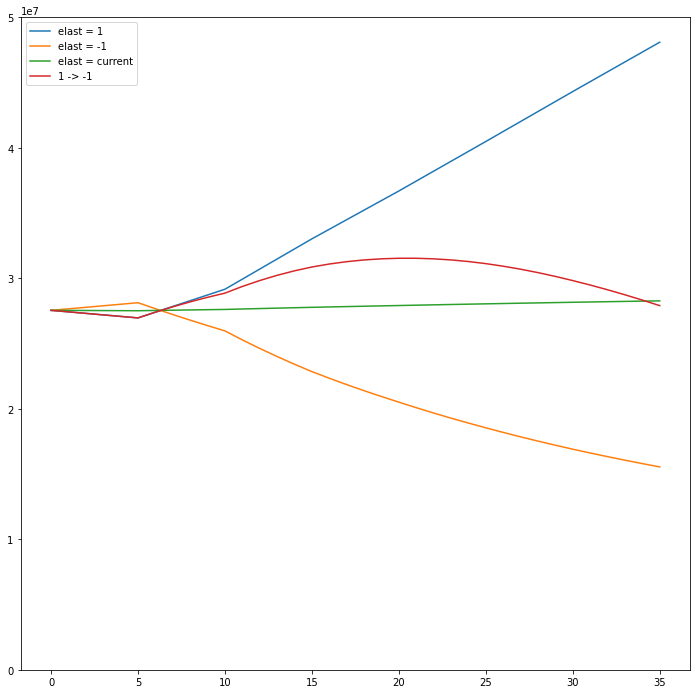

In [61]:
import matplotlib.pyplot as plt

x = np.array(dict_out[0]["brazil"]["time_period"])
#y = np.array(dict_out[0]["brazil"]["prod_ippu_metals_tonne"])
#y_low = np.array(dict_out[0]["brazil"]["prod_ippu_metals_tonne"])
#y_high = np.array(dict_out[0]["brazil"]["prod_ippu_metals_tonne"])
y_new = np.array(dict_out[0]["brazil"]["prod_ippu_metals_tonne"])
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_ylim([0, 5*10**7])
ax.plot(x, y_high, label = "elast = 1")
ax.plot(x, y_low, label = "elast = -1")
ax.plot(x, y, label = "elast = current")
ax.plot(x, y_new, label = "1 -> -1")
ax.legend()
plt.show()

In [13]:
fields_ext = [x for x in df_output.columns if "qty_waso_recyc" in x]
fields_ext += [x for x in df_output.columns if "frac_waso_recyc" in x]
fields_ext += [x for x in df_output.columns if "prod_ippu_" in x]
fields_ext += [x for x in df_output.columns if ("qty_ippu" in x) and ("used_in_production_tonne" in x)]
fields_ext += [x for x in df_output.columns if "emission_co2e_co2_ippu_production" in x]
fields_ext += [x for x in df_output.columns if ("emission_co2e_" in x) and ("metal" in x) and ("_co2_" not in x)]
print(dict_out[0]["brazil"][fields_ext].loc[35,:])

print("\t\t")
print(dict_out[6]["brazil"][fields_ext].loc[35,:])

prod_ippu_cement_tonne                                           6.443816e+07
prod_ippu_chemicals_tonne                                        1.174037e+08
prod_ippu_electronics_tonne                                      1.449657e+07
prod_ippu_glass_tonne                                            4.303791e+06
prod_ippu_lime_and_carbonite_tonne                               6.178289e+06
prod_ippu_metals_tonne                                           2.827954e+07
prod_ippu_paper_tonne                                            5.365896e+07
prod_ippu_plastic_tonne                                          9.089919e+06
prod_ippu_rubber_and_leather_tonne                               4.762676e+09
prod_ippu_textiles_tonne                                         3.517219e+06
qty_ippu_recycled_glass_used_in_production_tonne                 1.737801e+05
qty_ippu_recycled_metals_used_in_production_tonne                1.158534e+05
qty_ippu_recycled_paper_used_in_production_tonne                

In [32]:
df0 = dict_out[0]["brazil"]
cols = [x for x in df0.columns if ("emission_co2e" in x) and (("chemicals" in x) or ("plastic" in x))]
cols_all = [x for x in df0.columns if ("emission_co2e" in x)]


df0[cols].sum(axis = 1)

#for col in cols_all:
#    val = float(df0[col].iloc[0])
#    print(f"{col}:\t\t\t{val}")


0     74.168879
1     74.131837
2     74.094694
3     74.057448
4     74.020098
5     73.982644
6     74.097041
7     74.209699
8     74.320669
9     74.430003
10    74.537746
11    74.729388
12    74.916478
13    75.099231
14    75.277849
15    75.452519
16    75.615639
17    75.775503
18    75.932243
19    76.085980
20    76.236831
21    76.391039
22    76.542397
23    76.691012
24    76.836984
25    76.980409
26    77.123723
27    77.264626
28    77.403203
29    77.539532
30    77.673687
31    77.805217
32    77.934768
33    78.062402
34    78.188178
35    78.312151
dtype: float64

In [46]:
#df_check = pd.read_csv("/Users/jsyme/Downloads/data_complete_future_2022_06_28_pivot.csv")
#df_check[df_check["nation"].isin(["mexico"])][[x for x in df_check.columns if ("frac_waso_rec" in x)]]
df_check = pd.read_csv("/Users/jsyme/Downloads/data_complete_future_2022_06_28_pivot_test.csv")


In [54]:
df_check[[x for x in df_check.columns if "frac_waso_rec" in x]]
df_fgases

,time_period,ef_ippu_tonne_c2f6_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c2f6_per_tonne_production_electronics,ef_ippu_tonne_c2h3f3_per_mmm_gdp_product_use_ods_refrigeration,ef_ippu_tonne_c2hf5_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c2hf5_per_mmm_gdp_product_use_ods_refrigeration,ef_ippu_tonne_c3f8_per_tonne_production_electronics,ef_ippu_tonne_c3h2f6_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c3h2f6_per_mmm_gdp_product_use_ods_refrigeration,ef_ippu_tonne_c3h3f5_per_mmm_gdp_product_use_ods_other,...,ef_ippu_tonne_ch2f2_per_mmm_gdp_product_use_ods_refrigeration,ef_ippu_tonne_ch2f2_per_tonne_production_electronics,ef_ippu_tonne_ch3chf2_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_ch3chf2_per_mmm_gdp_product_use_ods_refrigeration,ef_ippu_tonne_chf2cf3_per_mmm_gdp_product_use_ods_refrigeration,ef_ippu_tonne_chf3_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_chf3_per_mmm_gdp_product_use_ods_refrigeration,ef_ippu_tonne_chf3_per_tonne_production_chemicals,ef_ippu_tonne_chf3_per_tonne_production_electronics,TransformationName
0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,none
1,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,none
2,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,none
3,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,none
4,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,31,0.557143,0.557143,0.557143,0.557143,0.557143,0.557143,0.557143,0.557143,0.557143,...,0.557143,0.557143,0.557143,0.557143,0.557143,0.557143,0.557143,0.557143,0.557143,full
68,32,0.542857,0.542857,0.542857,0.542857,0.542857,0.542857,0.542857,0.542857,0.542857,...,0.542857,0.542857,0.542857,0.542857,0.542857,0.542857,0.542857,0.542857,0.542857,full
69,33,0.528571,0.528571,0.528571,0.528571,0.528571,0.528571,0.528571,0.528571,0.528571,...,0.528571,0.528571,0.528571,0.528571,0.528571,0.528571,0.528571,0.528571,0.528571,full
70,34,0.514286,0.514286,0.514286,0.514286,0.514286,0.514286,0.514286,0.514286,0.514286,...,0.514286,0.514286,0.514286,0.514286,0.514286,0.514286,0.514286,0.514286,0.514286,full


In [69]:
df_se_trajectories = df_input_new.copy();
model_se = se.Socioeconomic(sa.model_attributes)
# add population and interpolate if necessary
sa.model_attributes.manage_pop_to_df(df_se_trajectories, "add")
model_se.check_df_fields(df_se_trajectories)
dict_dims, df_se_trajectories, n_projection_time_periods, projection_time_periods = sa.model_attributes.check_projection_input_df(df_se_trajectories, True, True, True)

vec_gdp = sa.model_attributes.extract_model_variable(df_se_trajectories, model_se.modvar_econ_gdp, False, return_type = "array_base")#np.array(df_afolu_trajectories[field_gdp])
vec_pop = np.sum(sa.model_attributes.extract_model_variable(df_se_trajectories, model_se.modvar_gnrl_subpop, False, return_type = "array_base"), axis = 1)
vec_gdp_per_capita = vec_gdp/vec_pop

# growth rates
vec_rates_gdp = vec_gdp[1:]/vec_gdp[0:-1] - 1
vec_rates_gdp_per_capita = vec_gdp_per_capita[1:]/vec_gdp_per_capita[0:-1] - 1

# calculate the housing occupancy rate
vec_gnrl_elast_occrate_to_gdppc = sa.model_attributes.extract_model_variable(df_se_trajectories, model_se.modvar_gnrl_elasticity_occrate_to_gdppc, False, return_type = "array_base")
vec_gnrl_init_occrate = sa.model_attributes.extract_model_variable(df_se_trajectories, model_se.modvar_gnrl_init_occ_rate, False, return_type = "array_base")
vec_gnrl_growth_occrate = sf.project_growth_scalar_from_elasticity(vec_rates_gdp, vec_gnrl_elast_occrate_to_gdppc, False, "standard")
vec_gnrl_occrate = vec_gnrl_init_occrate[0]*vec_gnrl_growth_occrate
vec_gnrl_num_hh = np.round(vec_pop/vec_gnrl_occrate).astype(int)

In [71]:
df_se_trajectories

,time_period,nation,gdp_mmm_usd,population_gnrl_urban,population_gnrl_rural,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,consumpinit_scoe_gj_per_hh_residential_elec_appliances,...,yf_agrc_fibers_tonne_ha,yf_agrc_fruits_tonne_ha,yf_agrc_maize_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_oil_bearing_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_tonne_ha,population_gnrl_total
0,0,argentina,53.939369,38471261.51,3573833.037,278040000.0,2000,20,2000,8.382,...,0.71,52.96,1.62,1.3,1,0.62,2.9,20,2.8,4.204509e+07
1,1,argentina,53.135885,38793803.69,3556178.993,278040000.0,2000,20,2000,8.382,...,0.71,52.96,1.62,1.3,1,0.62,2.9,20,2.8,4.234998e+07
2,2,argentina,52.332401,39116345.86,3538524.948,278040000.0,2000,20,2000,8.382,...,0.71,52.96,1.62,1.3,1,0.62,2.9,20,2.8,4.265487e+07
3,3,argentina,51.528918,39438888.04,3520870.904,278040000.0,2000,20,2000,8.382,...,0.71,52.96,1.62,1.3,1,0.62,2.9,20,2.8,4.295976e+07
4,4,argentina,50.725434,39761430.21,3503216.860,278040000.0,2000,20,2000,8.382,...,0.71,52.96,1.62,1.3,1,0.62,2.9,20,2.8,4.326465e+07
5,5,argentina,49.921950,40083972.38,3485562.816,278040000.0,2000,20,2000,8.382,...,0.71,52.96,1.62,1.3,1,0.62,2.9,20,2.8,4.356954e+07
6,6,argentina,50.462714,40386364.08,3457040.991,278040000.0,2000,20,2000,8.382,...,0.71,52.96,1.62,1.3,1,0.62,2.9,20,2.8,4.384341e+07
7,7,argentina,51.003478,40688755.79,3428519.166,278040000.0,2000,20,2000,8.382,...,0.71,52.96,1.62,1.3,1,0.62,2.9,20,2.8,4.411727e+07
8,8,argentina,51.544242,40991147.49,3399997.341,278040000.0,2000,20,2000,8.382,...,0.71,52.96,1.62,1.3,1,0.62,2.9,20,2.8,4.439114e+07
9,9,argentina,52.085007,41293539.19,3371475.517,278040000.0,2000,20,2000,8.382,...,0.71,52.96,1.62,1.3,1,0.62,2.9,20,2.8,4.466501e+07
